# Housing Prices Data Science Project
 **Author**: Areeba Ali 

---

## Project Objective
This project is part of the **Introduction to Data Science** course.  
We will analyze a unique housing dataset, preprocess it, build a predictive model, and finally create an **interactive Streamlit application**.

### Goals
✅ Perform **Exploratory Data Analysis (EDA)** with 10–15 different analyses  
✅ Preprocess the dataset for machine learning  
✅ Build and evaluate a predictive model  
✅ Deploy a **Streamlit app** for interactive predictions

---

## 📦 Dataset Overview

The dataset used: **Housing.csv**  
✅ Rows: 545  
✅ Columns: 13  
✅ Target variable: `price`  

### 🔗 Features:
- **Numerical**: `price`, `area`, `bedrooms`, `bathrooms`, `stories`, `parking`  
- **Categorical**: `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, `furnishingstatus`

---


### Expository Analysis

In [2]:

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Housing.csv')

# Dataset overview
print(df.shape)
df.info()
df.head()

(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Summary Statistics

In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Data Types and Unique Value Counts

In [4]:
df.dtypes
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

### Missing Value Analysis

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Histogram of numeric features

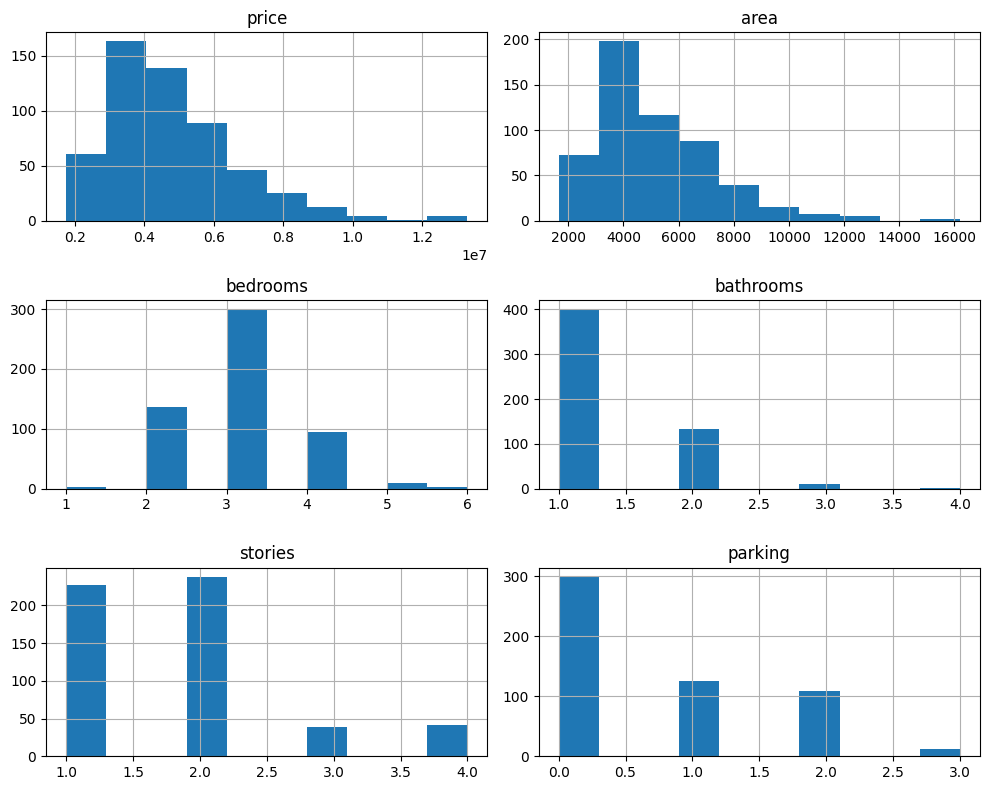

In [6]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### BoxPlots for outliers detection

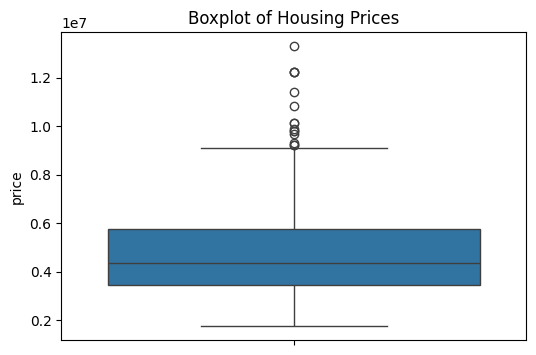

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(y='price', data=df)
plt.title('Boxplot of Housing Prices')
plt.show()

### Correlation Analysis

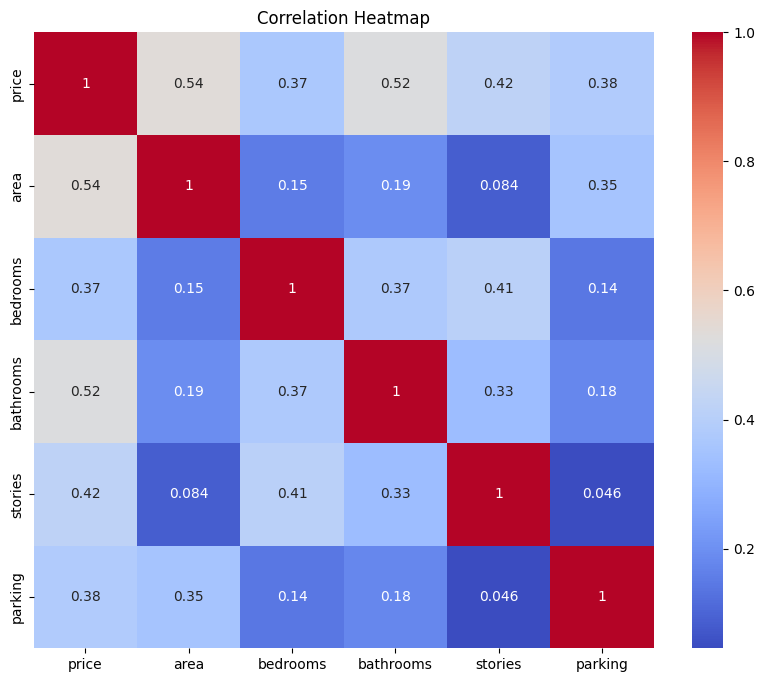

In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Pairwise Feature Relationships

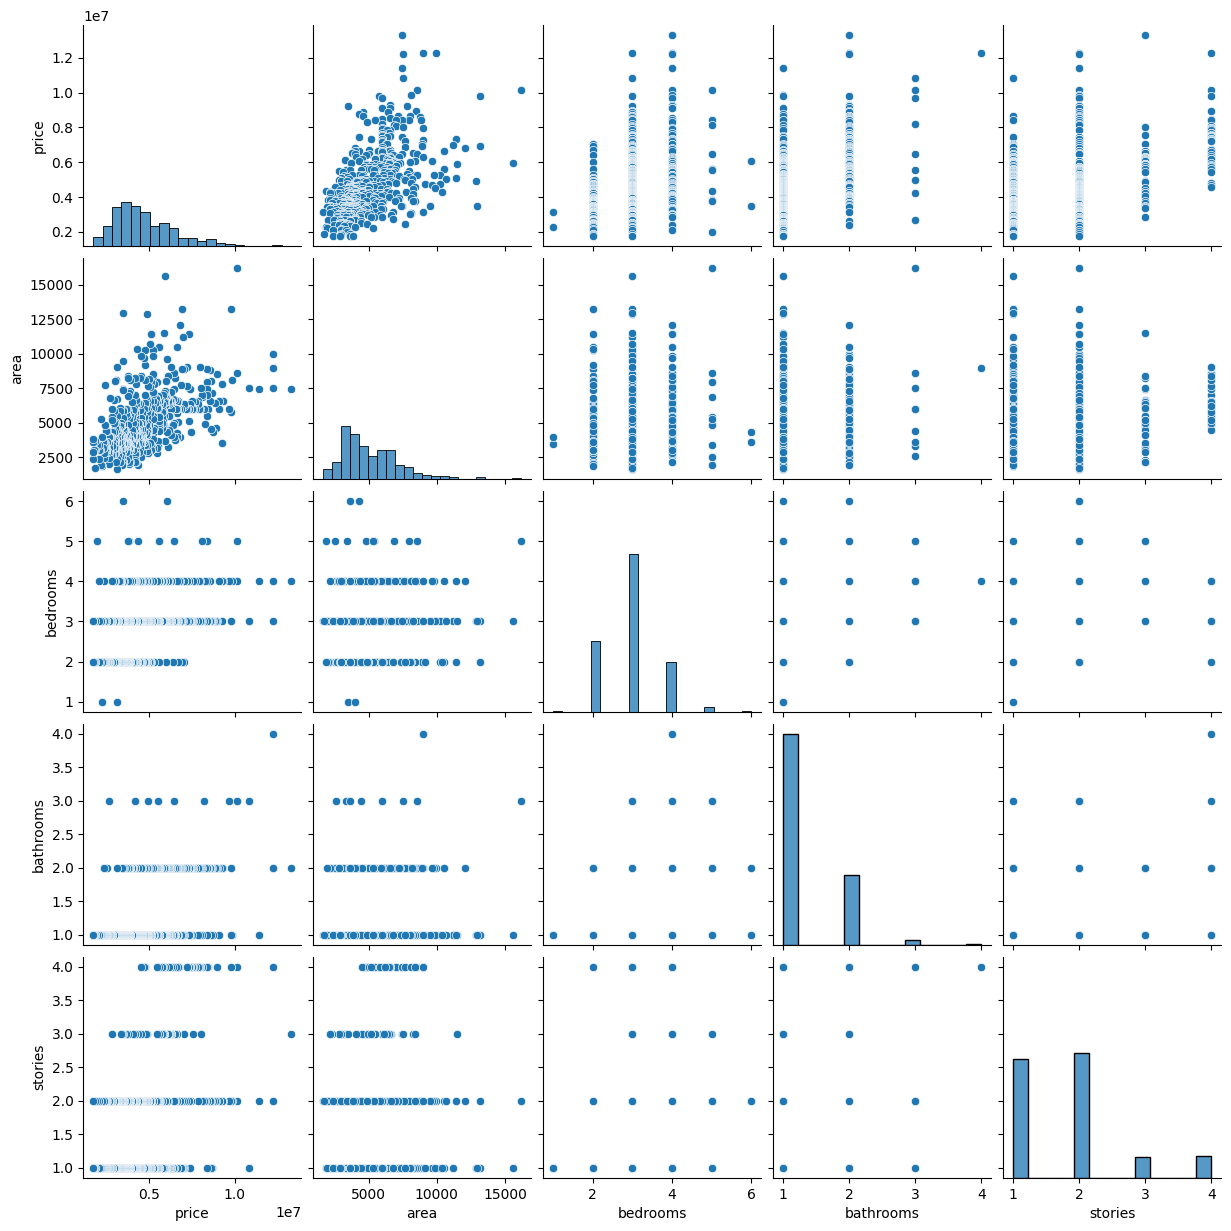

In [9]:
sns.pairplot(df, vars=['price', 'area', 'bedrooms', 'bathrooms', 'stories'])
plt.show()

### Count Plots for Categorical Variables

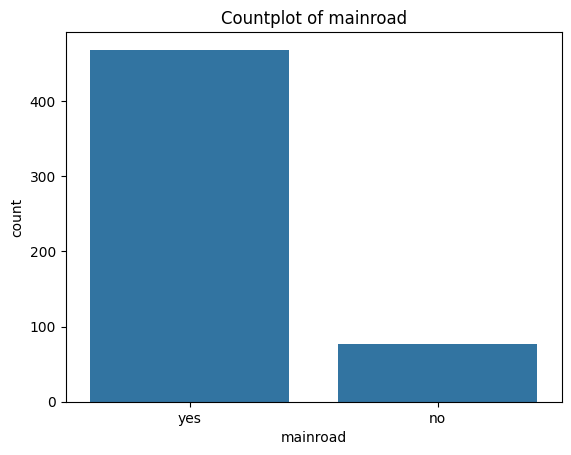

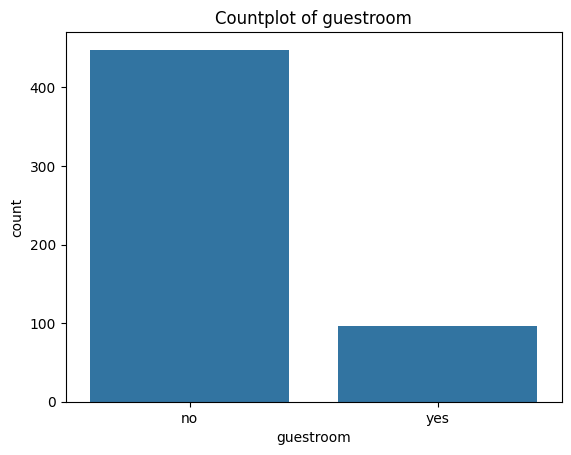

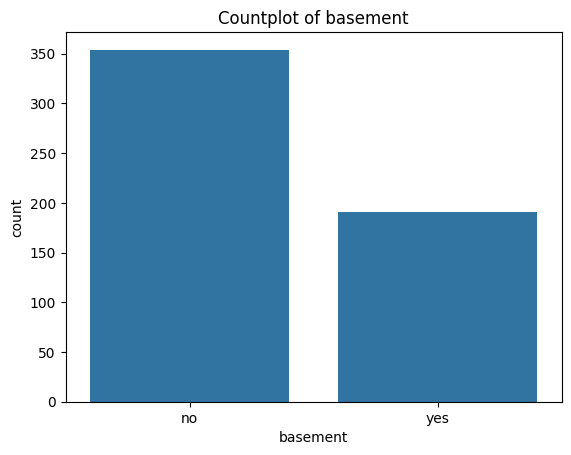

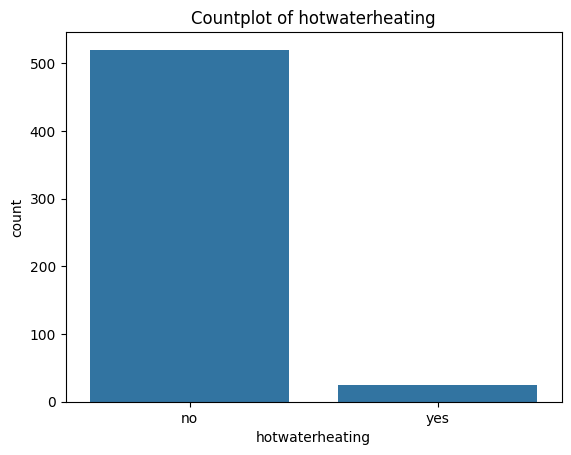

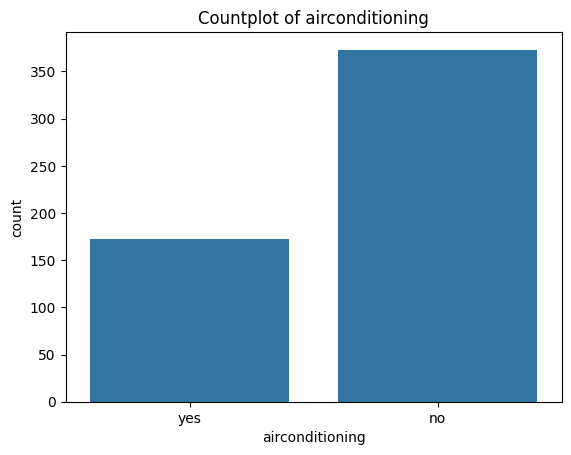

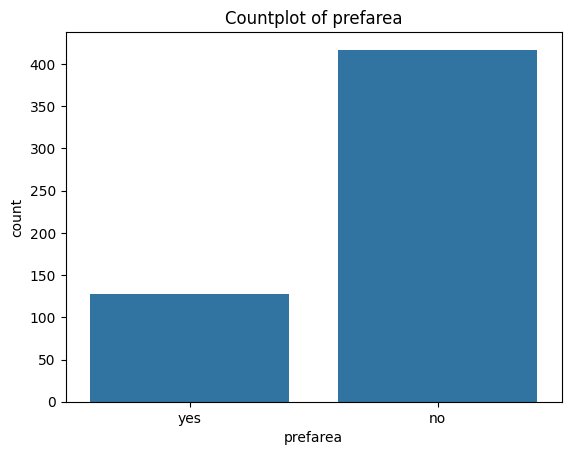

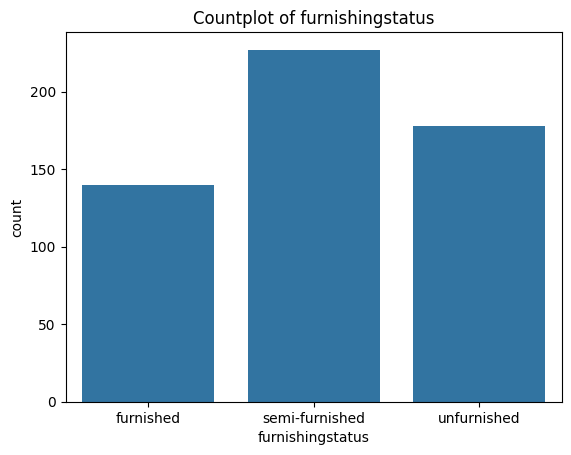

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.show()

### Feature Distribution Analysis (area, price)

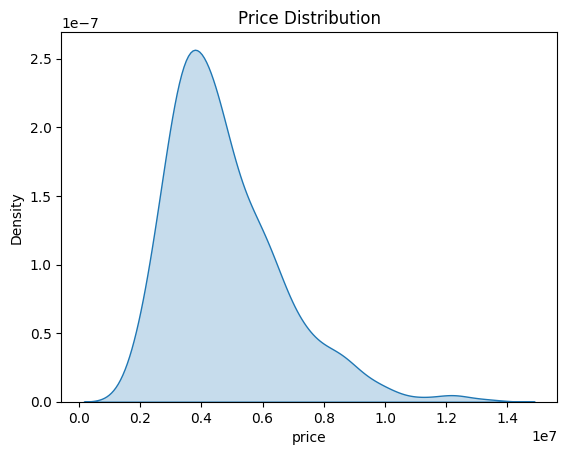

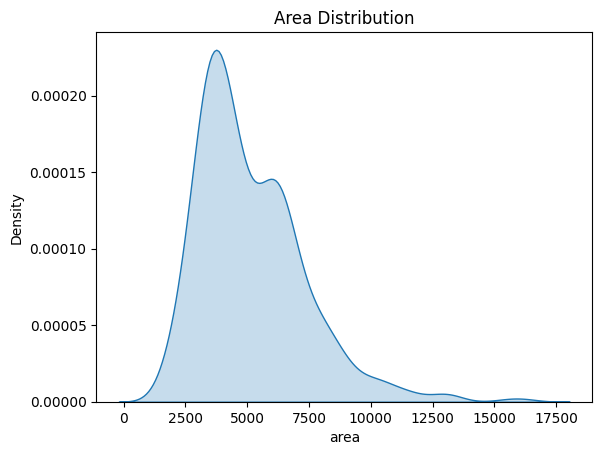

In [11]:
sns.kdeplot(df['price'], fill=True)
plt.title('Price Distribution')
plt.show()
sns.kdeplot(df['area'], fill=True)
plt.title('Area Distribution')
plt.show()

### Grouped Aggregation

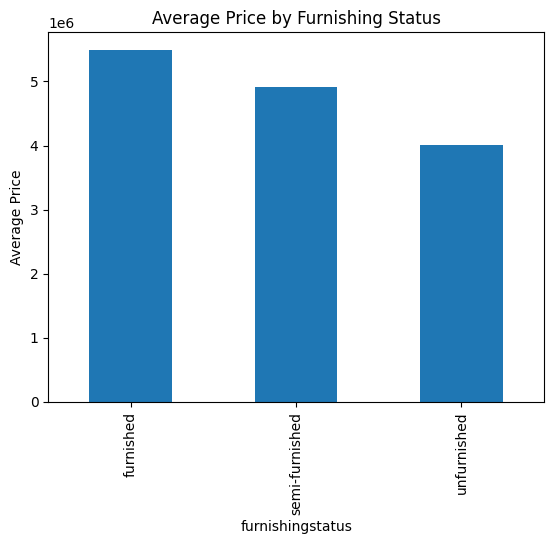

In [12]:
df.groupby('furnishingstatus')['price'].mean().plot(kind='bar')
plt.title('Average Price by Furnishing Status')
plt.ylabel('Average Price')
plt.show()

### Features Correlation With Price

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Now safely calculate correlations
correlations = numeric_df.corr()['price'].sort_values(ascending=False)
print(correlations)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


### Outliers Detection With IQR

In [14]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in price: {outliers.shape[0]}")

Number of outliers in price: 15


### Relationship of Parking and Price

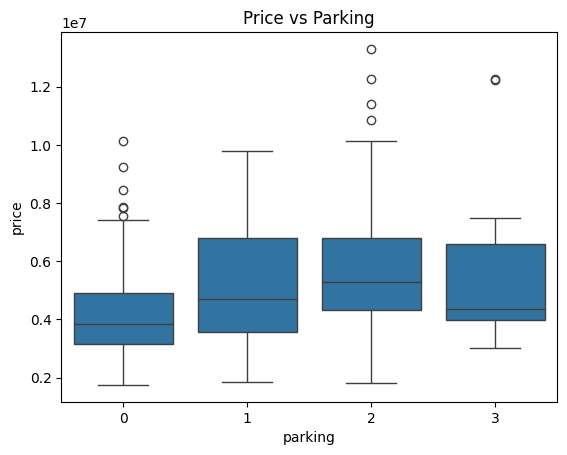

In [15]:
sns.boxplot(data=df, x='parking', y='price')
plt.title('Price vs Parking')
plt.show()

### Data Preprocessing

In [16]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Normalize numeric features
from sklearn.preprocessing import StandardScaler
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('price')
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
# Train-test split
from sklearn.model_selection import train_test_split
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building & Evaluation

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 1324506.9600914405
R²: 0.6529242642153175


In [18]:
import joblib

# Save your trained model
joblib.dump(model, 'model.pkl')        # e.g., LinearRegression() or other model

# Save the scaler (used for numeric feature scaling)
joblib.dump(scaler, 'scaler.pkl')

# Save the list of columns/features used for the model
joblib.dump(list(X_train.columns), 'model_columns.pkl')


['model_columns.pkl']